# Project Name: Drinking Water Potability Prediction using ML and H2O Auto ML

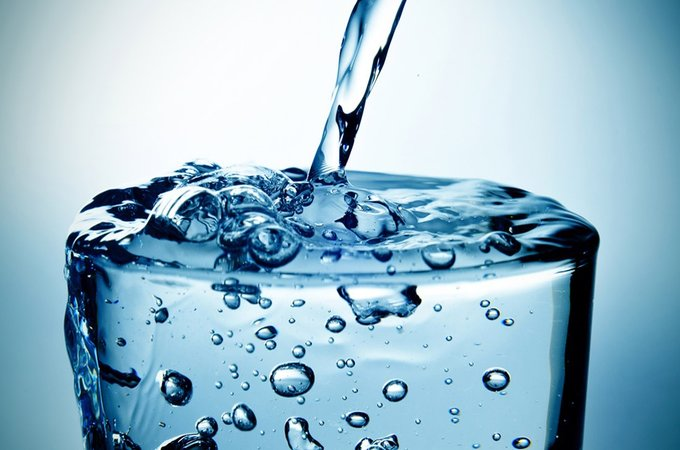

## Context :
### Access to safe drinking water is essential to health, a basic human right, and a component of effective policy for health protection. This is important as a health and development issue at a national, regional, and local level. In some regions, it has been shown that investments in water supply and sanitation can yield a net economic benefit, since the reductions in adverse health effects and health care costs outweigh the costs of undertaking the interventions.

### The drinkingwaterpotability.csv file contains water quality metrics for 3276 different water bodies

### We will use different ML models and H2O Auto ML library in this project

## Time Line of the Project:
- Importing Libraries and DataSet
- Data Analysis and Preprocessing
- Feature Engineering
- Model Building using ML
- Model Building and Prediction using H2O Auto ML

## Importing Libraries

In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
%matplotlib inline

## Loading the Data Set

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
df= pd.read_csv("/content/drive/MyDrive/drinking_water_potability.csv")

In [ ]:
df.head()

In [ ]:
df.shape

In [ ]:
df.info()

In [ ]:
df.nunique()

## Data Analysis

In [ ]:
sns.countplot(data=df,x=df.Potability)
df.Potability.value_counts()

In [ ]:
df.isnull().sum()

### Handling Null Values

In [ ]:
null= ['ph','Sulfate','Trihalomethanes']

In [ ]:
#for i in null:
    #sns.distplot(df[i])

In [ ]:
sns.distplot(df.ph)

In [ ]:
df['ph'] = df['ph'].replace(np.nan, df.ph.mean())

In [ ]:
sns.distplot(df.Sulfate)

In [ ]:
df['Sulfate'] = df['Sulfate'].replace(np.nan,df.Sulfate.mean())

In [ ]:
sns.distplot(df.Trihalomethanes)

In [ ]:
df['Trihalomethanes'] = df['Trihalomethanes'].replace(np.nan,df.Trihalomethanes.mean())

In [ ]:
df.isnull().sum()

In [ ]:
sns.pairplot(data=df,hue='Potability')

In [ ]:
for column in df.columns:
    plt.figure()
    df.boxplot([column])

In [ ]:
df.corr()

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True)

### Feature Engineering

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
x = df.drop(['Potability'],axis=1)
y =df.Potability

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier,RandomForestClassifier

In [ ]:
Ext = ExtraTreesClassifier()
Ext.fit(x,y)

In [ ]:
print(Ext.feature_importances_)

In [ ]:
feature = pd.Series(Ext.feature_importances_,index=x.columns)
feature.sort_values(ascending=True).nlargest(10).plot(kind='barh')

In [ ]:
df.head()

### Let us Standardize our data

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scale= StandardScaler()

In [ ]:
scaled= scale.fit_transform(x)

In [ ]:
scaled_df = pd.DataFrame(scaled,columns= x.columns)
scaled_df.head()

### Our data is ready for model building

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)

## Model Development
### We will use the following models:
- Logistic Regression
- SVM
- Random Forest

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

## Logistic Regression

In [ ]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_train_hat = lr.predict(X_train)
y_test_hat = lr.predict(X_test)


print('Test performance')
print('-------------------------------------------------------')
print(classification_report(y_test, y_test_hat))

print('Roc_auc score')
print('-------------------------------------------------------')
print(roc_auc_score(y_test, y_test_hat))
print('')

print('Confusion matrix')
print('-------------------------------------------------------')
print(confusion_matrix(y_test, y_test_hat))
print('')

print('accuracy score')
print('-------------------------------------------------------')
print("test data accuracy score:",accuracy_score(y_test, y_test_hat)*100)
print("train data accuracy score:",accuracy_score(y_train, y_train_hat)*100)

## Support Vector Machines

In [ ]:
svm = SVC()
svm.fit(X_train, y_train)
y_train_hat = svm.predict(X_train)
y_test_hat = svm.predict(X_test)

print('Test performance')
print('-------------------------------------------------------')
print(classification_report(y_test, y_test_hat))

print('Roc_auc score')
print('-------------------------------------------------------')
print(roc_auc_score(y_test, y_test_hat))
print('')

print('Confusion matrix')
print('-------------------------------------------------------')
print(confusion_matrix(y_test, y_test_hat))
print('')

print('accuracy score')
print('-------------------------------------------------------')
print(accuracy_score(y_test, y_test_hat)*100)
print("test data accuracy score:",accuracy_score(y_test, y_test_hat)*100)
print("train data accuracy score:",accuracy_score(y_train, y_train_hat)*100)

## Random Forest

In [ ]:
rf = RandomForestClassifier(n_jobs=-1,random_state=123)
rf.fit(X_train, y_train)
y_train_hat = rf.predict(X_train)
y_test_hat = rf.predict(X_test)

print('Test performance')
print('-------------------------------------------------------')
print(classification_report(y_test, y_test_hat))

print('Roc_auc score')
print('-------------------------------------------------------')
print(roc_auc_score(y_test, y_test_hat))
print('')

print('Confusion matrix')
print('-------------------------------------------------------')
print(confusion_matrix(y_test, y_test_hat))
print('')

print('accuracy score')
print('-------------------------------------------------------')
print("test data accuracy score:",accuracy_score(y_test, y_test_hat)*100)
print("train data accuracy score:",accuracy_score(y_train, y_train_hat)*100)

## Using Auto ML

## H2O Auto ML

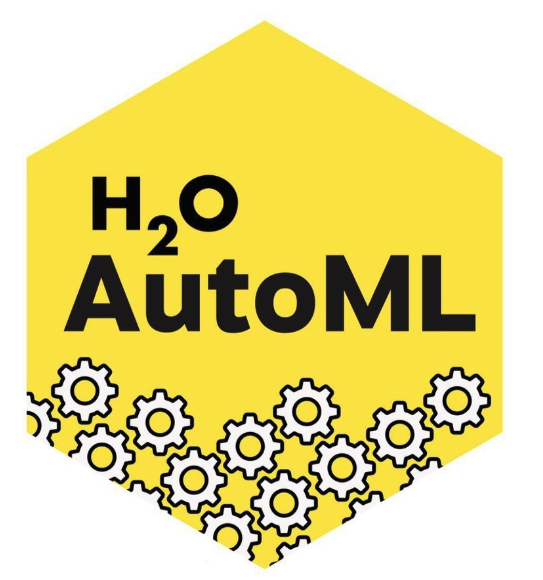

### H2O is a fully open-source, distributed in-memory machine learning platform with linear scalability. H2O supports the most widely used statistical & machine learning algorithms, including gradient boosted machines, generalized linear models, deep learning, and many more.

### Installing H2O Auto ML

In [ ]:
!pip install requests
!pip install tabulate
!pip install "colorama>=0.3.8"
!pip install future

In [ ]:
!pip install h2o

## Importing the h2o Python module and H2OAutoML class

In [ ]:
import h2o
from h2o.automl import H2OAutoML
h2o.init(max_mem_size='16G')  ##  the h2o.init() makes sure that no prior instance of H2O is running.

### Loading data

In [ ]:
df = h2o.import_file("/content/drive/MyDrive/drinking_water_potability.csv")

In [ ]:
df.head()

## H2O auto ml can do all the data preprocessing techniques

In [ ]:
df_train,df_test= df.split_frame(ratios=[.8])

### Splitting the data

In [ ]:
y = "Potability"  ## dependent variable
x = df.columns  ## Independent variable
x.remove(y)

### Defining the model

In [ ]:
aml = H2OAutoML(max_runtime_secs=300,max_models = 10, seed = 10, verbosity="info", nfolds=2)

### Fitting the model

In [ ]:
aml.train(x=x,y=y, training_frame=df_train)

### Seeing the Leaderboard

In [ ]:
lb = aml.leaderboard

In [ ]:
lb

## Getting all the model ids

In [ ]:
model_ids = list(aml.leaderboard['model_id'].as_data_frame().iloc[:,0])

In [ ]:
model_ids

In [ ]:
aml.leader.model_performance(df_test)

### Getting the model details for best performing model

In [ ]:
h2o.get_model([mid for mid in model_ids if "StackedEnsemble" in mid][0])

In [ ]:
output= h2o.get_model([mid for mid in model_ids if "StackedEnsemble" in mid][0])
output.params

In [ ]:
aml.leader

In [ ]:
y_pred=aml.leader.predict(df_test)

In [ ]:
y_pred

### If probablity greater than 0.5 than it is a 1 else it is a 0